# Week 3 in class

#### Learning goals
- Solving equations
- Optimizing functions
- Application of these skills to consumer theory

## Numerical math with Python

With python we can maximize and minimize functions and solve equations. These routines can be found in the `optimize` module of the `scipy` library. 

In [53]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Solving an equation

Suppose we would like to solve $5x - 10 =0$. In Python we can solve this equation using the function `root`. As this is a simple equation, you can also do this analytically. Because it is so simple, it helps us to understand how `root` works.

For our purposes here, we call `root` as `opt.root`. If you want to know more about `root`, simply google "python root" or use `opt.root?` in a cell below. You will see that `root` requires two arguments: the function we are solving, and an initial value where `root` starts looking for a solution. 

`root` uses numerical techniques to find the "zero" of a function; it does not solve the equation analytically. Roughly speaking, it looks at the value $f(x)$ of a given $x$ and checks whether $f(x)$ is above or below 0. If it is below 0, it needs to change $x$ in such a way that $f(x)$ increases. It uses the derivative $f'(x)$ to figure out whether it should increase or decrease $x$ to get to $f(x)=0$. So suppose that $f(x) < 0$ and $f'(x) >0$ then it will increase $x$ (move to the right) to a solution to $f(x) =0$.

To illustrate this in a simple example, consider the following cell. We specify a function $f$ of one variable ($x$) only. Then we call `root` on $f$ and give our initial guess for the solution; here we guess that $x=0$ may be close to the solution. 

For the function below, this initial guess does not matter (just try out different values for the initial guess to verify this). For more complicated functions, the initial guess may matter a lot. It is usually a good idea to plot the function to get an idea of a reasonable value for the initial guess.

In [9]:
def f(x):
    return -10 + 5*x
zero=opt.root(f, 2)
zero

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 3
     qtf: array([0.])
       r: array([-5.])
  status: 1
 success: True
       x: array([2.])

Note that the function `root` returns multiple values: the derivative, the function value, information about the convergence process, and ultimately, the solution itself: `x`. 

----------

**Exercise 1**

Extract the solution so that it prints: 2.0

In [18]:
# YOUR CODE HERE
#raise NotImplementedEr
zero.x


array([2.])

**Exercise 2**

Define a function `my_function` with two arguments that returns $x^2+c$.

In [22]:
# YOUR CODE HERE
#raise NotImplementedError()
def my_function(x,c):
    return x**2 + c


The function `my_function` above is a function of two variables ($x$ and $c$). Now suppose we are only interested in the solution of $x$ (for a *given* value of $c$). One way to resolve this, is to define a new "anonymous" function using a `lambda` function that is only a function of $x$. We call this function anonymous because we don't need to give it a name: we only use it within `root` and have no plans to call it again later on. 

----------

**Exercise 3**

Adapt the command below to find a solution for $x^2-2$ with $x=1$ as an initial value. Use an anonymous function that embeds `my_function`. 

In [28]:
opt.root(lambda x: my_function(x,-2),1)

    fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.93144891e-10])
       r: array([-2.82842925])
  status: 1
 success: True
       x: array([1.41421356])

In [27]:
#Answer
opt.root(lambda x: my_function(x,-2),1)

    fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.93144891e-10])
       r: array([-2.82842925])
  status: 1
 success: True
       x: array([1.41421356])

Note that this command gives only one solution. But with a quadratic equation, there are usually two solutions!

----------

[**Exercise 4**]

Give the python command to give the other solution. What do you need to change in the `root` command above?

In [40]:
# YOUR CODE HERE
#raise NotImplementedError()


ValueError: Unable to select a solver as neither bracket nor starting point provided.

[**Exercise 5**] 

Now try to evaluate the following cell. Check whether $x=0$ is a solution for `my_function`$=0$. Explain why the output shows: `success: False`.

In [41]:
opt.root(lambda x: my_function(x,-2),0)

    fjac: array([[-1.]])
     fun: array([-2.])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 13
     qtf: array([2.])
       r: array([0.])
  status: 5
 success: False
       x: array([0.])

YOUR ANSWER HERE

[**Exercise 6** ]

Now we let's consider another function, with $c = 2$ (instead of $c = -2$). Explain below why `success: False` this time

In [42]:
opt.root(lambda x: my_function(x,2),-1)

    fjac: array([[-1.]])
     fun: array([2.00000095])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 21
     qtf: array([-2.00000381])
       r: array([-0.00976563])
  status: 5
 success: False
       x: array([-0.00097656])

YOUR ANSWER HERE

## Optimizing a function

**Exercise 7** 

Define the function $f(x) = \cos(x)+2$ in python. Hint: you may have to google or use `np.` and then TAB to see how to do this.


In [67]:
# YOUR CODE HERE
#raise NotImplementedError()
def f(x):
    return np.cos(x) + 2


**Exercise 8** 

Plot this function for $x \in [0,7]$.

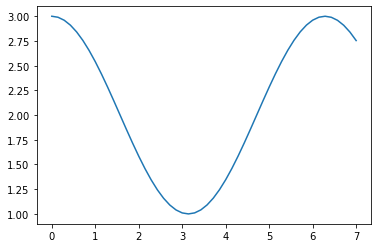

In [85]:
# YOUR CODE HERE
#raise NotImplementedError()
plot = np.linspace(0,7)
plt.plot(plot, f(plot))

The optimize routine has a number of algorithms to minimize functions. We will use `opt.minimize_scalar`. Check the documentation of this function in the jupyter notebook.

----------

**Exercise 9** 

Calculate the minimum of $f$ on the interval $[0,7]$. What is this number? Make sure the minimum actually lies within $[0,7]$!

In [95]:
# YOUR CODE HERE
#raise NotImplementedError()
Minimum =opt.minimize_scalar(f)
Minimum

     fun: 1.0
    nfev: 13
     nit: 8
 success: True
       x: 3.1415926536439596

YOUR ANSWER HERE

While the optimize routine has a number of algorithms to minimize functions, it cannot maximize... How can we find the maxima if there are no maximization routines in python?

----------

**Exercise 10** 

Use `opt.minimize_scalar` to find the two maxima of $f$ on the interval $[0,7]$.  HINT: remember the anonymous function above and experiment with the bounds within which Python should search.

In [104]:
# YOUR CODE HERE
#raise NotImplementedError()


NameError: name 'scipy' is not defined

## Application: Consumer Theory

A common use of maximization in economics is to model
optimal consumption decisions <https://en.wikipedia.org/wiki/Consumer_choice>. In this section of the notebook you will have to apply all you learned above to consumer choice.

### Preferences and Utility Functions

To summarize introductory economics, take a set of
[preferences](https://en.wikipedia.org/wiki/Preference_%28economics%29) of consumers over “bundles”
of goods (e.g. 2 apples and 3 oranges is preferred to 3 apples and 2 oranges, or a 100% chance to
win $ 1 $ dollar is preferred to a 50% chance to win $ 2.10 $ dollars).

Under certain assumptions, you rationalize the preferences as a utility function over the different
goods (always remembering that the utility is simply a tool to order preferences and the numbers are
usually not meaningful themselves).

For example, consider a utility function over bundles of bananas (B) and apples (A)

$$
U(A, B) = B^{\alpha}A^{1-\alpha}
$$

Where $ \alpha \in [0,1] $.


----------

**Exercise 11**

Define this particular utility function for a default argument $\alpha=1/3$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Exercise 12**

Plot this utility function for a value of $B=1.5$ and a domain for $A$ from 1 to 10. Label the axes with `A` and `U(A, B=1.5)`, respectively

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

If you did it right, you will notice that

- $ U(A, 1.5) $ is always higher with more $ A $, hence, consuming more apples has a positive marginal utility  i.e. $ \frac{d U(A, 1.5)}{d A} > 0 $.  
    
- The more apples we consume, the smaller the change in marginal utility, i.e.
  $ \frac{d^2 U(A, 1.5)}{d A^2} < 0 $.  

----------

**Exercise 13**

Continue to consider $B=1.5$. What is the level of utility at $A=8$? Compute using Python.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Exercise 14**

Continue to consider $B=1.5$. For which $A$ is utility equal to 3? Compute using Python. *Hint:* think of an equation that equals zero and use an anonymous function.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Indifference curves

If we plot both the $ B $ and the $ A $, we can see how the utility changes with different
bundles.

Text(0.5, 1.0, 'U(A,B)')

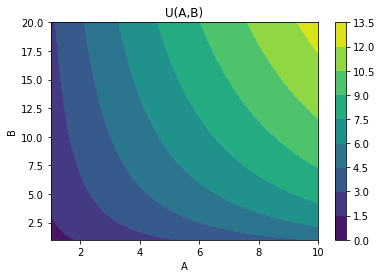

In [10]:
fig, ax = plt.subplots()
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), U(A, B))
fig.colorbar(contours)
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_title("U(A,B)")

We can find the bundles between which the consumer would be indifferent by fixing a
utility $ \bar{U} $ and by determining all combinations of $ A $ and $ B $ where
$ \bar{U} = U(B, A) $. In this example, we can implement this calculation by letting $ B $ be the variable on the
x-axis and solving for $ A(\bar{U}, B) $

$$
A(B, \bar{U}) = U^{\frac{1}{1-\alpha}}B^{\frac{-\alpha}{1-\alpha}}
$$

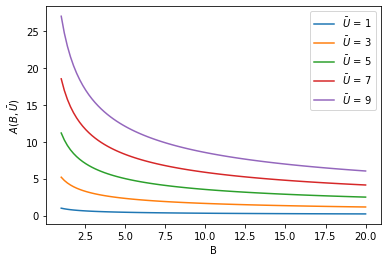

In [11]:
def A_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
    ax.plot(B, A_indifference(B, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    ax.set_xlabel("B")
    ax.set_ylabel(r"$A(B, \bar{U}$)")

fig, ax = plt.subplots()
plot_indifference_curves(ax)

Note that in every case, if you increase either the number of apples or bananas (holding the other
fixed), you reach a higher indifference curve. Consequently, in a world without scarcity or budgets, consumers would consume
an arbitrarily high number of both to maximize their utility.

### Budget Constraints

While the above example plots consumer preferences, it says nothing about what the consumers can afford. The simplest sort of constraint is a budget constraint where bananas and apples both have a price
and the consumer has a limited amount of funds.

If the prices per banana and per apple are identical, no matter how many you consume, then the
affordable bundles are simply all pairs of apples and bananas below the line.
$ p_a A + p_b B \leq W $.

For example, if consumer has a budget of $ W $, the price of apples is $ p_A = 2 $ dollars per
apple, and the price of bananas is normalized to be $ p_B = 1 $ dollar per banana, then the consumer
can afford anything below the line.

$$
2 A + B \leq W
$$

Or, letting $ W = 20 $ and plotting

<AxesSubplot:xlabel='B', ylabel='A'>

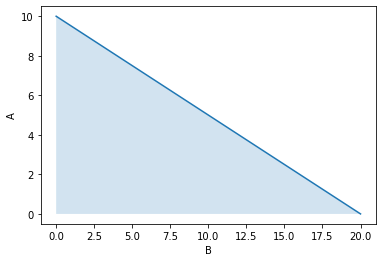

In [12]:
def A_bc(B, W=20, pa=2):
    "Given B, W, and pa return the max amount of A our consumer can afford"
    return (W - B) / pa

def plot_budget_constraint(ax, W=20, pa=2):
    B_bc = np.array([0, W])
    A = A_bc(B_bc, W, pa)
    ax.plot(B_bc, A)
    ax.fill_between(B_bc, 0, A, alpha=0.2)
    ax.set_xlabel("B")
    ax.set_ylabel("A")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

While the consumer can afford any of the bundles in that area, most will not be optimal.

### Optimal Choice

Putting the budget constraints and the utility functions together lets us visualize the optimal
decision of a consumer. Choose the bundle with the highest possible indifference curve within its
budget set.

<AxesSubplot:xlabel='B', ylabel='A'>

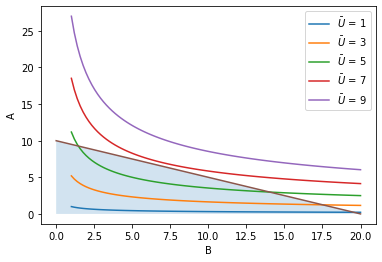

In [13]:
fig, ax = plt.subplots()
plot_indifference_curves(ax)
plot_budget_constraint(ax)

We have several ways to find the particular point $ A, B $ of maximum utility, such as
finding the point where the indifference curve and the budget constraint have the same slope, but a
simple approach is to just solve the direct maximization problem.

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Solving this problem directly requires solving a multi-dimensional constrained optimization problem,
where scipy <https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize>
has several options.

For this particular problem, we notice two things: (1) The utility function is increasing in both
$ A $ and $ B $, and (2) there are only 2 goods.

This allows us 1) to assume that the budget constraint holds at equality, $ p_a A + B = W $, 2) to
form a new function $ A(B) = (W - B) / p_a $ by rearranging the budget constraint at equality, and
3) to substitute that function directly to form:

$$
\max_{B}  B^{\alpha}A(B)^{1-\alpha}
$$

Compared to before, this problem has been turned into an unconstrained univariate optimization
problem.

To implement this in code, notice that the $ A(B) $ function is what we defined before
as `A_bc`.

----------

**Exercise 15**

Find the maximum utility for $W=20$ and $p_A = 2$ (and $p_B = 1$). For which $A$ and $B$ can this maximum utility be obtained? *Hint:* Remember that `mimimize_scalar` can only minimize functions.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()